# Data Loading

In [2]:
import pandas as pd

# load dataset
df = pd.read_csv("../data/superstore.csv")

# view first rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Country       9994 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

# Data Cleaning & Preprocessing


This section cleans the dataset by handling missing values,
removing duplicates, fixing date format, and checking outliers.


In [6]:
# check missing values
df.isnull().sum()


Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# check duplicates
df.duplicated().sum()


0

In [8]:
# convert order date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")


In [9]:
df["Order Date"].head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Ship Date     9994 non-null   object        
 4   Ship Mode     9994 non-null   object        
 5   Customer ID   9994 non-null   object        
 6   Segment       9994 non-null   object        
 7   Country       9994 non-null   object        
 8   City          9994 non-null   object        
 9   State         9994 non-null   object        
 10  Region        9994 non-null   object        
 11  Product ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [10]:
df.describe()


,Row ID,Order Date,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,623.245101,2.225110,0.206452,234.260108


# Exploratory Data Analysis (EDA)


## Monthly Sales Trend


In [13]:
df["Month"] = df["Order Date"].dt.month

monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales


Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

In [14]:
# convert month number to month name
df["Month"] = df["Order Date"].dt.month_name()

monthly_sales = df.groupby("Month")["Sales"].sum().sort_values(ascending=False)

monthly_sales


Month
November     352461.0710
December     325293.5035
September    307649.9457
March        205005.4888
October      200322.9847
August       159044.0630
May          155028.8117
June         152718.6793
July         147238.0970
April        137762.1286
January       94924.8356
February      59751.2514
Name: Sales, dtype: float64

Sales show strong seasonality with highest revenue in November and December, indicating increased demand during holiday seasons. February shows lowest sales, suggesting opportunity for promotional strategies.

# Top Selling Products 


In [17]:
# top 10 selling products
top_products = df.groupby("Product Name")["Sales"].sum() \
                 .sort_values(ascending=False) \
                 .head(10)

top_products


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

In [18]:
top_products.to_frame()


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


Top products generate a large share of total revenue, with office equipment like copiers and binding machines showing the highest sales performance.
This indicates strong demand for business technology products and helps companies focus marketing, inventory, and profit strategies on high-performing items.

# Regional Sales Performance 


In [21]:
# sales by region
region_sales = df.groupby("Region")["Sales"].sum()

region_sales


Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [22]:
region_sales.to_frame()


,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


West and East regions show the highest sales performance, while South has the lowest sales, indicating a need for improved marketing and expansion strategies.

# Profit Analysis (Category Wise)


In [25]:
# profit by category → convert to DataFrame
category_profit = df.groupby("Category")["Profit"].sum().reset_index()

category_profit


,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


Technology generates the highest profit, while Furniture shows the lowest profitability, indicating a need for improvement in the Furniture category.

# Data Visualization


In [28]:
import matplotlib.pyplot as plt


## Monthly Sales Trend Visualization


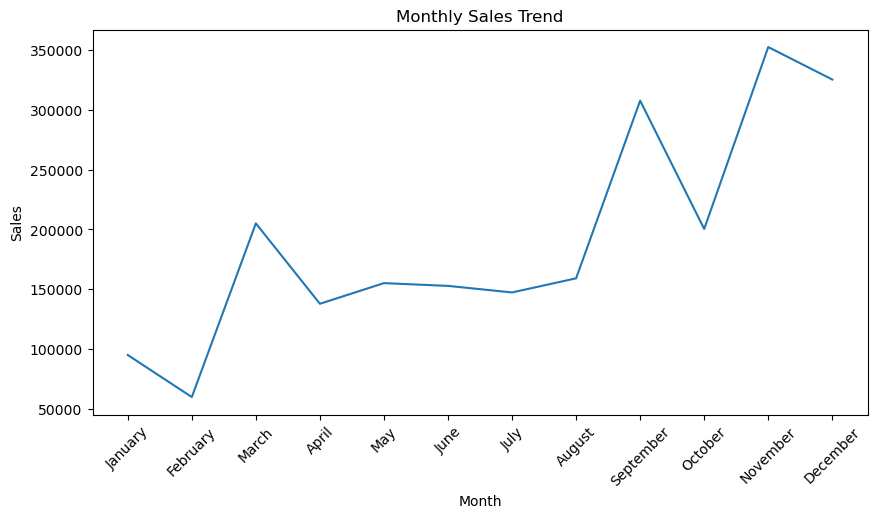

In [54]:
# plot chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))   # make chart wider

monthly_sales.plot(kind="line")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")

# force show all months
plt.xticks(range(len(month_order)), month_order, rotation=45)

plt.show()


Sales increased in September and November, showing strong seasonal demand. January has the lowest sales, indicating weaker market performance.

## Regional Sales Visualization


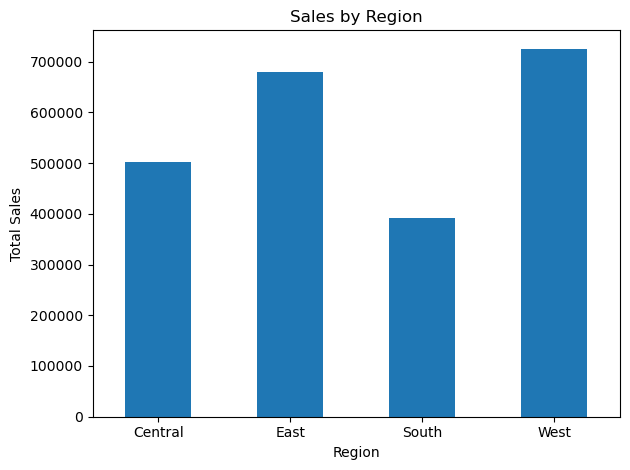

In [32]:
df.groupby("Region")["Sales"].sum().plot(kind="bar")

plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")

# improve chart look
plt.xticks(rotation=0)
plt.tight_layout()

# save and show chart
plt.savefig("../images/region_sales.png")
plt.show()


West region generates the highest sales, followed by East, showing strong market performance in these areas, while South has the lowest sales, indicating potential opportunities for improvement and better marketing strategies.